# The footprint of a letter

## Setup

In [1]:
# YOUR EDIT HERE #
# Remember, keep your auth token to yourself!
# If you want to store this notebook in github, remember to remove your token first!
auth_token = "***REMOVED***"

In [2]:
import requests

url = "https://competitions.aiolympiad.my/api/maio_2025/maio_2025_letter_footprint"

def post_answer(data: dict):
    response = requests.post(url=url, json=data, headers={"X-API-Key": auth_token})
    if response.status_code == 200:
        return response.json()
    else:
        return f"Failed to submit, status code is {response.status_code}\n{response.text}"

## Introduction

You are provided with this model below.

In [3]:
# You need Pytorch for this!
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# As long as you are on version 2.x of Pytorch, you'll be fine!
torch.__version__

'2.4.1+cpu'

In [5]:
# Do you know why it is important that this seed is fixed?
# Google or ask an LLM assistant if you don't! :)
torch.manual_seed(42)

In [6]:
class SimpleNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Specific weight initialization
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize weights with random values
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.02)

        # Initialize biases to zero
        nn.init.constant_(self.fc1.bias, 0.0)
        nn.init.constant_(self.fc2.bias, 0.0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [7]:
model = SimpleNet(input_size=26, hidden_size=64, output_size=50).to("cpu")

Notice how the input size is 26. This is entirely by design, such that each element of the input corresponds with each letter of the alphabet.

You are also provided with this list of vectors below.

In [8]:
footprint1 = torch.FloatTensor([
    -0.0293, -0.1092, -0.0290,  0.0885,  0.0623, -0.1106, -0.0229,  0.1987,
    -0.1062,  0.1949, -0.0279,  0.0705, -0.2228, -0.0478, -0.1745,  0.1071,
    -0.0549,  0.1062,  0.1074, -0.0229, -0.1208, -0.0866, -0.1071, -0.0919,
     0.1597,  0.1101,  0.0335,  0.0424, -0.1154,  0.0375,  0.0545, -0.2223,
    -0.0270, -0.0340,  0.0261,  0.1256,  0.0372, -0.0898, -0.1757,  0.1671,
    -0.1561,  0.0908,  0.0166, -0.0705, -0.0078, -0.0120, -0.0082, -0.0245,
    -0.1756, -0.0689
])

In [9]:
footprint2 = torch.FloatTensor([
    -0.1702, -0.2287, -0.0547, 0.0448, 0.2204, 0.0330, -0.1223, 0.0966,
    -0.0118, -0.0911, 0.1477, 0.1065, -0.3109, -0.0817, -0.0824, 0.1230,
    0.1757, 0.1231, -0.0162, -0.1775, -0.1278, -0.1683, 0.1159, 0.1903,
    -0.0053, 0.0484, -0.0476, 0.0044, -0.0514, -0.1619, -0.0399, 0.0002,
    0.0555, -0.2482, -0.0462, -0.4026, -0.0799, -0.3325, -0.0719, 0.2053,
    0.0951, 0.2918, -0.0194, -0.0637, -0.1995, 0.1005, -0.0509, -0.0357,
    -0.2760, -0.1030
])

In [10]:
footprint3 = torch.FloatTensor([
    -0.1158, -0.2736, -0.1917,  0.1027, -0.0901,  0.3210, -0.1885,  0.1472,
     0.1963, -0.1349, -0.2345,  0.5342, -0.2488,  0.2003, -0.0306, -0.1891,
     0.1288,  0.2327,  0.0963, -0.1089, -0.2410,  0.1069, -0.1464, -0.2085,
     0.0420,  0.1267, -0.1581, -0.0614,  0.0604,  0.0312, -0.2559,  0.0039,
     0.3445, -0.0059,  0.0890, -0.0916,  0.1148,  0.0775,  0.0633,  0.1515,
    -0.1137,  0.0521, -0.0418,  0.0388, -0.0424,  0.0375, -0.0586,  0.0932,
    -0.0640, -0.1933
])

In [11]:
footprint4 = torch.FloatTensor([
    0.2047, -0.2309, -0.2069, -0.3843,  0.0616, -0.0781,  0.1256,  0.2333,
    -0.0234, -0.0146, -0.3804,  0.3934, -0.1173, -0.2266, -0.2054,  0.0861,
    -0.0513,  0.1966,  0.1906,  0.0125, -0.3607, -0.2924, -0.0591, -0.3109,
     0.3125,  0.4452, -0.1773, -0.1590, -0.2283, -0.0456, -0.0041, -0.0896,
     0.1555, -0.1307,  0.2646, -0.1352,  0.1714,  0.0815,  0.3392, -0.2495,
     0.2008, -0.0400,  0.0700, -0.1225, -0.3702, -0.2685,  0.0006, -0.2181,
    -0.0386, -0.4234
])

Each vector corresponds to outputs of the network when specific letters are passed through the network. The network takes in letters by accepting a 26-dim vector that is all zeros save for the $i^{th}$ position having a non-zero value, representing the $i^{th}$ letter in the alphabet.

These letters left nothing behind aside from these "footprints".

## Your task

Find the four letters that led to the "footprints" above. When you do, submit your answer following the example below. Make sure your letters are all lowercase and combined into a single string.

```python
post_answer({"solution": "abcd"})
```

This challenge will be graded via both API submission and notebook submission. Scoring as follows:

- 2 pts for submitting the correct string through `post_answer()`. Score will be calculated via autograder. 10 submissions allowed.
- 2 pts if (a) your answer is correct, and (b) your notebook submission demonstrates a method that shows clear logical reasoning with verifiable steps.
- 3 pts if (a) your answer is correct, and (b) your notebook submission shows your method will still have similar runtime even if the number of characters in the alphabet is increased to 10,000.
- 3 pts if (a) your answer is correct, and (b) you can find the numerical values used to represent the letters in the first place! Get within +/-5% for your answers to count.
- Partial credit to be given at discretion

In [14]:
# Your work below :)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

### Part I: Get the string

In [15]:
footprints = [footprint1, footprint2, footprint3, footprint4]
cos_sim = np.zeros((26, len(footprints)))

In [16]:
for i in range(26):
    test_tensor = torch.FloatTensor(np.zeros((26, )))
    test_tensor[i] = 0.1
    with torch.no_grad():
        out_tensor = model(test_tensor)

    for j in range(len(footprints)):
        cos_sim[i, j] = cosine_similarity(out_tensor.reshape(1, -1), footprints[j].reshape(1, -1)).item()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\matplotlib\\pyplot.py'>

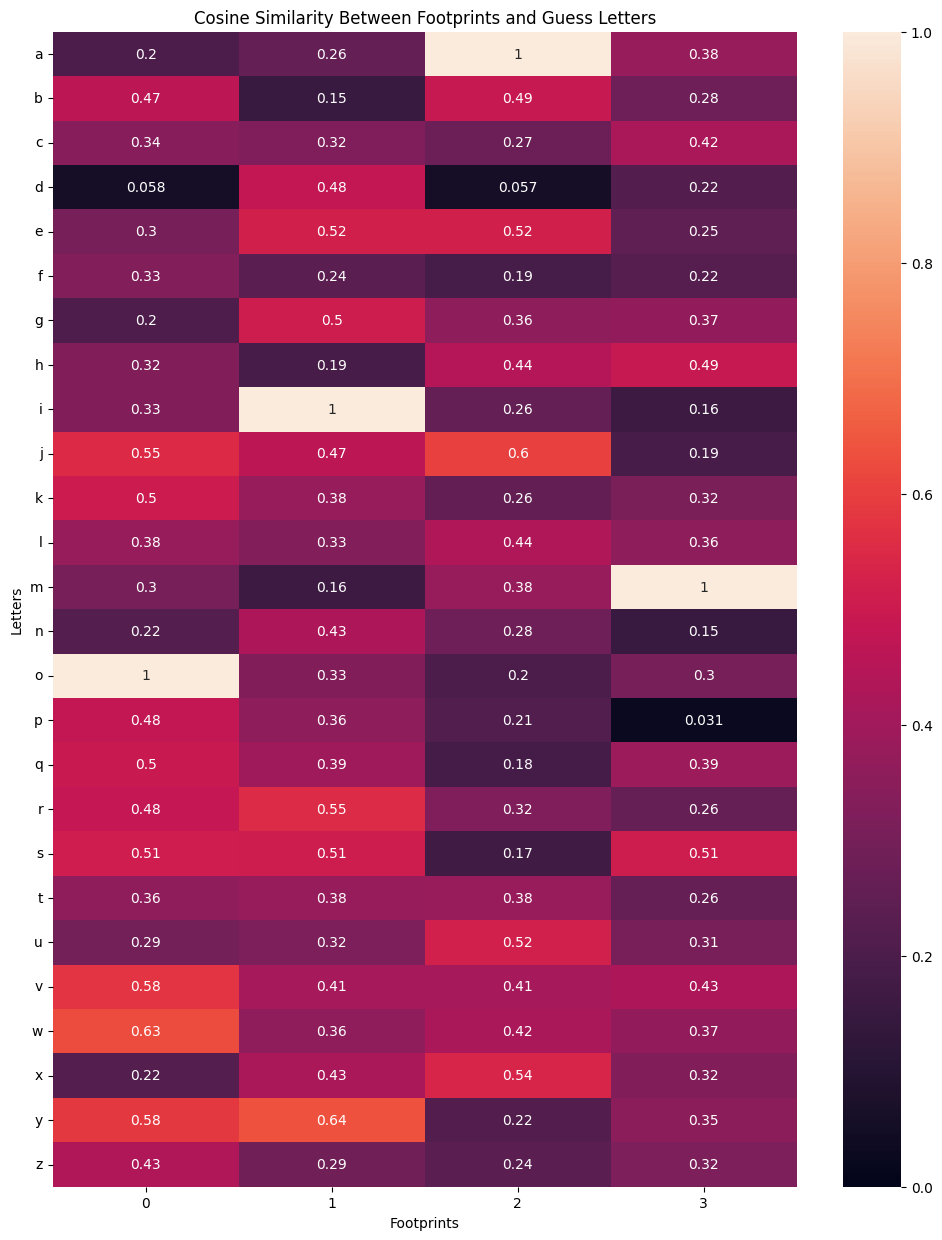

In [17]:
plt.figure(figsize=(12, 15))
plt.title("Cosine Similarity Between Footprints and Guess Letters")
ax = sns.heatmap(cos_sim, annot=True, vmin=0, vmax=1)
ax.set_xlabel("Footprints")
ax.set_ylabel("Letters")
ax.set_yticklabels([chr(ord('a') + i) for i in range(26)])
plt.yticks(rotation=0)
plt

In [18]:
cos_sim_max_pos = np.argmax(cos_sim, axis=0)
my_answer = "".join(map(lambda x: chr(ord('a') + x), cos_sim_max_pos))
my_answer

'oiam'

In [18]:
post_answer({"solution": my_answer})

{'status': 'SUCCESS',
 'message': 'Answer for challenge maio_2025_letter_footprint submitted successfully on 2025-03-15 04:48:43.616945+00:00. Total submissions is 1 / 10.'}

### Part II: Get the input tensor

In [19]:
for name, param in model.state_dict().items():
    print(f"{name}:\n{param}\n{param.shape}\n")

fc1.weight:
tensor([[ 0.0081,  0.0323,  0.0090,  ...,  0.0111, -0.0261,  0.0328],
        [-0.0068,  0.0027, -0.0183,  ...,  0.0243,  0.0192,  0.0103],
        [ 0.0115,  0.0016, -0.0101,  ...,  0.0528,  0.0234,  0.0254],
        ...,
        [-0.0085,  0.0125, -0.0129,  ...,  0.0146, -0.0100,  0.0141],
        [ 0.0068, -0.0268, -0.0058,  ..., -0.0268,  0.0192, -0.0367],
        [-0.0258,  0.0322, -0.0269,  ..., -0.0074,  0.0263,  0.0068]])
torch.Size([64, 26])

fc1.bias:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([64])

fc2.weight:
tensor([[-0.0032, -0.0190, -0.0131,  ...,  0.0211,  0.0101,  0.0091],
        [ 0.0363, -0.0307, -0.0073,  ..., -0.0111, -0.0116,  0.0241],
        [-0.0018, -0.0133, -0.0058,  ..., -0.0003,  0.0142, -0.0037],
 

In [20]:
w1 = model.fc1.weight.detach().numpy().astype(np.float64)
w2 = model.fc2.weight.detach().numpy().astype(np.float64)
w1.shape, w2.shape

((64, 26), (50, 64))

The pipeline:

$$
\underset{q_1}{(1, 26)} \longrightarrow \underset{w_1}{\boxed{\text{FC1}}} \longrightarrow \underset{q_2}{(1, 64)} \longrightarrow \underset{\max(0, x)}{\boxed{\text{ReLU}}} \longrightarrow \underset{q_3}{(1, 64)} \longrightarrow \underset{w_w}{\boxed{\text{FC2}}} \longrightarrow \underset{q_2}{(1, 50)}
$$

I mess up the shape here; it's either $m\times n$ or $n\times m$. It doesn't matter here.

In [21]:
from scipy.optimize import lsq_linear

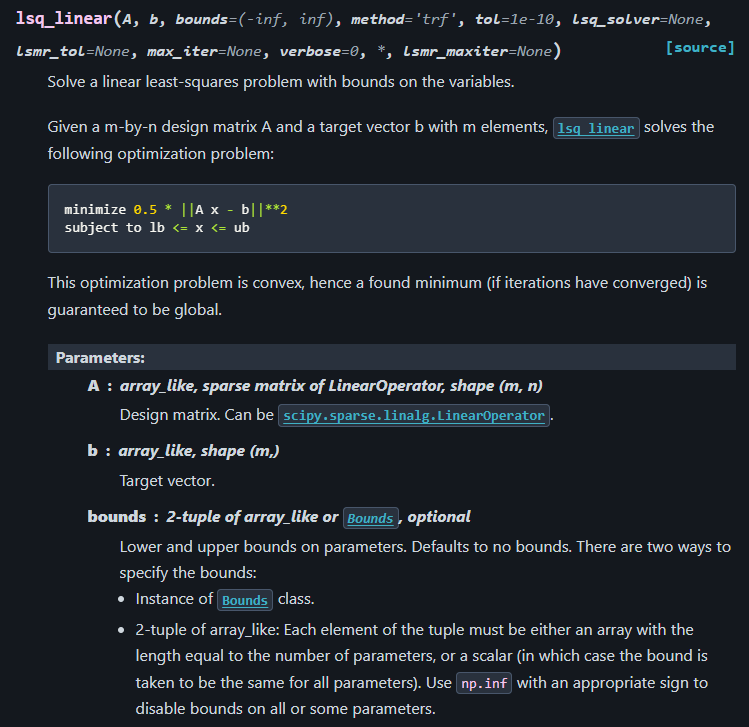

In [22]:
def rev_eng_fc2(out_tensor):
    out_arr = out_tensor.detach().numpy().astype(np.float64)
    res = lsq_linear(w2, out_arr.flatten(), bounds=(0, np.inf))
    if not res.success:
        raise RuntimeError(res)
    return res.x

In [23]:
fp1_q3 = rev_eng_fc2(footprint1)
np.round(fp1_q3, 4).tolist()  # For showcasing only

[0.0,
 0.0,
 1.0728,
 0.0,
 0.475,
 0.0006,
 0.0,
 0.5164,
 0.7938,
 0.0,
 1.5604,
 0.0,
 0.0,
 0.3371,
 0.0014,
 0.5187,
 0.7417,
 0.2972,
 0.0002,
 0.2112,
 0.0016,
 0.0007,
 0.2552,
 0.0003,
 0.4821,
 0.0,
 0.6414,
 0.8587,
 0.246,
 0.0005,
 0.0001,
 0.0009,
 0.0,
 0.0,
 1.1978,
 0.0584,
 0.0,
 1.0351,
 0.0005,
 1.5965,
 0.0,
 0.0,
 0.0179,
 0.0011,
 0.4572,
 0.1905,
 0.625,
 0.6758,
 0.3487,
 1.0246,
 0.0,
 0.0,
 1.4569,
 0.3459,
 1.2981,
 0.7326,
 0.6212,
 0.0014,
 0.0005,
 0.0,
 0.0009,
 0.0,
 0.2747,
 0.4256]

In [24]:
def rev_eng_fc1(out_relu_arr_flattened, non_zero_pos, tol=1e-2):
    rows_non_zero = np.where(np.abs(out_relu_arr_flattened) > tol)[0]
    res = out_relu_arr_flattened[rows_non_zero] / w1[rows_non_zero, non_zero_pos]

    q1 = np.percentile(res, 25)
    q3 = np.percentile(res, 75)
    # Outliers may be present for small tol, we use IQR to measure dispersion to prevent
    # being influenced by outliers
    return res, np.median(res), q3 - q1

In [25]:
res, med, iqr = rev_eng_fc1(fp1_q3, cos_sim_max_pos[0])
res, med, iqr

(array([40.02360998, 40.26940367, 39.98894764, 40.01425545, 40.00139515,
        39.97834598, 39.94793057, 39.97919691, 39.94499819, 39.94052499,
        39.95501787, 39.9870625 , 39.98122348, 40.04329101, 39.98518508,
        40.02879123, 40.24497533, 39.99365307, 39.97392055, 42.5883199 ,
        40.01845137, 39.82107638, 40.02745836, 40.03935519, 40.11924511,
        39.99640987, 39.95969715, 40.04418452, 39.99522121, 39.98978964,
        40.02329239, 39.89158296, 40.16133422]),
 39.99522121289199,
 0.050445249287349725)

In [26]:
test_tensor = np.zeros(26)
test_tensor[cos_sim_max_pos[0]] = med
test_tensor = torch.FloatTensor(test_tensor)
test_tensor

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 39.9952,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000])

In [27]:
from sklearn.metrics import mean_squared_error

Calculate RMSE:

In [28]:
np.sqrt(mean_squared_error(footprint1.detach().numpy(), model(test_tensor).detach().numpy()))

3.5637622e-05

It works! Let's do it altogether.

In [29]:
def test_tensor(ref_tensor, val, pos):
    pred_in_tensor = np.zeros(26)
    pred_in_tensor[pos] = val
    pred_in_tensor = torch.FloatTensor(pred_in_tensor)

    pred_out_tensor = model(pred_in_tensor)
    rmse = np.sqrt(mean_squared_error(ref_tensor.detach().numpy(), pred_out_tensor.detach().numpy()))
    return pred_in_tensor, rmse

In [30]:
def rev_eng(q4, non_zero_pos):
    """
    Given the output tensor, deduce the input tensor of SimpleNet.
    """
    q3 = rev_eng_fc2(q4)
    all_possible_q1_val, q1_val, q1_val_iqr = rev_eng_fc1(q3, non_zero_pos)
    assert q1_val_iqr < 1, f"Inconsistent value obtained (median:{q1_val}, IQR: {q1_val_iqr}), {all_possible_q1_val}"

    q1, rmse = test_tensor(q4, q1_val, non_zero_pos)
    assert rmse < 1e-4, f"Predicted tensor does not yield the same result as the actual (RMSE: {rmse}), {q1}"
    
    return q1

In [31]:
my_answer = []
for idx, footprint in enumerate(footprints):
    my_answer.append(rev_eng(footprint, cos_sim_max_pos[idx]))
my_answer

[tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 39.9952,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]),
 tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         60.0119,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]),
 tensor([80.0035,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]),
 tensor([  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0177,   0.0000,
           0.0000,   0.000

#### Manual Check

In [32]:
test_tensor(footprint1, 40, 14)

(tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2.899625e-05)

In [33]:
test_tensor(footprint2, 60, 8)

(tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2.8128396e-05)

In [34]:
test_tensor(footprint3, 80, 0)

(tensor([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2.9454437e-05)

In [35]:
test_tensor(footprint4, 100, 12)

(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.]),
 2.988206e-05)

#### Answer

| Footprint | Letter | Position | Value |
| --- | --- | --- | --- |
| `footprint1` | o | 14 | 40 |
| `footprint2` | i | 8 | 60 |
| `footprint3` | a | 0 | 80 |
| `footprint4` | m | 12 | 100 |

### Part III: A Slightly Better Approach

The current `rev_eng` still depends on `cos_sim_max_pos` in Part I, which is time-consuming since we iteratively feed tensors to determine the position. 

Previously, we pinpointed the target letter (a-z) and filtered out zero rows before analysis. Why not do it directly? Let's see if this works:

In [36]:
w1.shape, fp1_q3.shape

((64, 26), (64,))

In [37]:
tiled_fp1_q3 = np.tile(fp1_q3.reshape(-1, 1), (1, 26))  # Tile column vector horizontally 26 times
tiled_fp1_q3, tiled_fp1_q3.shape

(array([[7.61884480e-11, 7.61884480e-11, 7.61884480e-11, ...,
         7.61884480e-11, 7.61884480e-11, 7.61884480e-11],
        [1.32176892e-05, 1.32176892e-05, 1.32176892e-05, ...,
         1.32176892e-05, 1.32176892e-05, 1.32176892e-05],
        [1.07277988e+00, 1.07277988e+00, 1.07277988e+00, ...,
         1.07277988e+00, 1.07277988e+00, 1.07277988e+00],
        ...,
        [2.62866765e-10, 2.62866765e-10, 2.62866765e-10, ...,
         2.62866765e-10, 2.62866765e-10, 2.62866765e-10],
        [2.74687136e-01, 2.74687136e-01, 2.74687136e-01, ...,
         2.74687136e-01, 2.74687136e-01, 2.74687136e-01],
        [4.25585578e-01, 4.25585578e-01, 4.25585578e-01, ...,
         4.25585578e-01, 4.25585578e-01, 4.25585578e-01]]),
 (64, 26))

Text(-104.47625, 17.955, 'Note: Values in range (-1, 1) are excluded.')

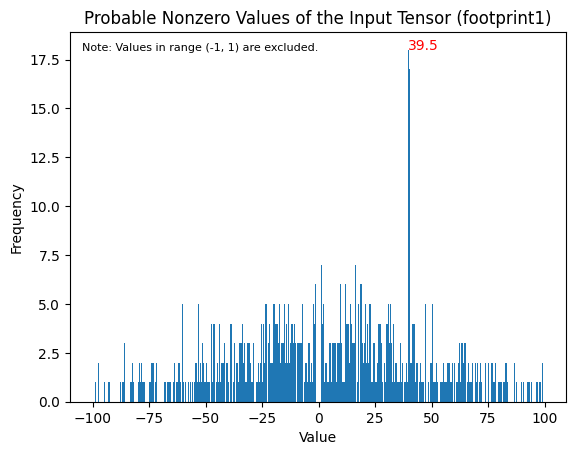

In [39]:
div_res = tiled_fp1_q3 / w1
counts, bins, _ = plt.hist(div_res[np.abs(div_res) >= 1], bins=np.arange(-100, 100, 0.5))
max_count = counts.max()
max_bin = bins[np.argmax(counts)]
plt.text(max_bin, max_count, f'{max_bin}', fontsize=10, color='red')
plt.title("Probable Nonzero Values of the Input Tensor (footprint1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.text(
    x=plt.xlim()[0] * 0.95,
    y=plt.ylim()[1] * 0.95,
    s="Note: Values in range (-1, 1) are excluded.",
    fontsize=8
)

---

The code below can run standalone.

In [82]:
from scipy.optimize import lsq_linear
import numpy as np


class ReverseEngineer:
    def __init__(self, model):
        self.model = model
        self.w1 = model.fc1.weight.detach().numpy().astype(np.float64)
        self.w2 = model.fc2.weight.detach().numpy().astype(np.float64)

    def construct_tensor(self, val, pos):
        in_arr = np.zeros(self.model.fc1.in_features)
        in_arr[pos] = val
        return torch.FloatTensor(in_arr) 

    def predict(self, footprint):
        footprint_arr = footprint.detach().numpy().astype(np.float64)
        
        after_relu_arr = self.__rev_fc2(footprint_arr)
        val, pos, letter = self.__rev_fc1(after_relu_arr)
        
        return {"tensor": self.construct_tensor(val, pos), "letter": letter, "value": val, "position": pos}
        
    def __rev_fc2(self, out_arr):
        res = lsq_linear(self.w2, out_arr.flatten(), bounds=(0, np.inf))
        if not res.success:
            raise RuntimeError(res)
        return res.x.reshape(-1, 1)

    def __rev_fc1(self, after_relu_arr):
        tiled = np.tile(after_relu_arr, (1, self.model.fc1.in_features))

        div_arr = tiled / self.w1
        filtered_div_arr = div_arr[np.abs(div_arr) >= 1]

        rounded_arr = np.round(filtered_div_arr, 2)
        unique_vals, counts = np.unique(rounded_arr, return_counts=True)
        most_freq_val = unique_vals[np.argmax(counts)]

        eq_mask = (np.round(div_arr, 2) == most_freq_val)
        col_counts = eq_mask.sum(axis=0)
        most_contributing_col = np.argmax(col_counts)

        return most_freq_val, most_contributing_col, chr(ord('a') + most_contributing_col)

In [83]:
result = []

rev = ReverseEngineer(model)
for footprint in [footprint1, footprint2, footprint3, footprint4]:
    result.append(rev.predict(footprint))

result

[{'tensor': tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 39.9900,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000]),
  'letter': 'o',
  'value': 39.99,
  'position': 14},
 {'tensor': tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          60.0500,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000]),
  'letter': 'i',
  'value': 60.05,
  'position': 8},
 {'tensor': tensor([79.9900,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000]),
  'letter': 'a',
  'value': 79.99,


### Performance

In [84]:
metric_in_tensor_small = rev.construct_tensor(2025, 12)
metric_out_tensor_small = model(metric_in_tensor_small)

In [85]:
rev.predict(metric_out_tensor_small)

{'tensor': tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0., 2025.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.]),
 'letter': 'm',
 'value': 2025.0,
 'position': 12}

In [86]:
%%timeit -n 10
rev.predict(metric_out_tensor_small)

11.9 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
model1 = SimpleNet(input_size=10_000, hidden_size=64, output_size=50).to("cpu")
rev1 = ReverseEngineer(model1)

In [88]:
metric_in_tensor_large = rev1.construct_tensor(2025, 1482)
metric_out_tensor_large = model1(metric_in_tensor_large)

In [89]:
rev1.predict(metric_out_tensor_large)

{'tensor': tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 'letter': 'ث',
 'value': 2025.0,
 'position': 1482}

In [90]:
%%timeit -n 10
rev1.predict(metric_out_tensor_large)

49.7 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
